<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *CEO of Otteri Wash & Dry in Singapore branch wanted to optimize company's business in term of revenue gathering and cost-saving to reply on local weather conditions. So he started to explore monthly climate statistics from Jan 1984 to Aug 2022 in order to initiate annual strategic planning.

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:

def mean_value(*args) :
    sum = 0
    count = 0
    for i in args:
        sum += i
        count+=1
    return sum/count
        
        

In [2]:
mean_value(1,2,3,4)

2.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
# Code:
def sd_value(*args):
    sum = 0
    count = 0
    for i in args:
        sum += (i-mean_value(*args))**2
        count +=1
    return (sum/count)**0.5

In [4]:
sd_value(1,2,3,4)

1.118033988749895

In [5]:
#Another way if the input is list:

def cal_sd(numbers):
    if len(numbers) < 2:
        return None
    mean = sum(numbers)/len(numbers)
    squared_diff = sum((x - mean) ** 2 for x in numbers)
    variance = squared_diff / (len(numbers))
    std_deviation = variance ** 0.5
    return std_deviation


In [6]:
sd_value(1,2,3,4)

1.118033988749895

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [7]:
# Imports:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as mn


## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [8]:
# Code:
days = pd.read_csv("rainfall-monthly-number-of-rain-days.csv")
mm = pd.read_csv("rainfall-monthly-total.csv")

In [9]:
df = pd.merge(days, mm, how='left')
df.head()

,month,no_of_rainy_days,total_rainfall
0,1982-01,10,107.1
1,1982-02,5,27.8
2,1982-03,11,160.8
3,1982-04,14,157.0
4,1982-05,10,102.2


In [10]:
hrain=pd.read_csv("RainfallMonthlyHighestDailyTotal.csv")
humid=pd.read_csv("RelativeHumidityMonthlyMean.csv")
sunshine=pd.read_csv("SunshineDurationMonthlyMeanDailyDuration.csv")
satmax=pd.read_csv("SurfaceAirTemperatureMonthlyMeanDailyMaximum.csv")
satmin=pd.read_csv("SurfaceAirTemperatureMonthlyMeanDailyMinimum.csv")
satmean=pd.read_csv("SurfaceAirTemperatureMonthlyMean.csv")


In [11]:
df = pd.merge(df,hrain,how='left')
df = pd.merge(df,humid,how='left')
df = pd.merge(df,sunshine,how='left')
df = pd.merge(df,satmean,how='left')
df = pd.merge(df,satmin,how='left')
df = pd.merge(df,satmax,how='left')

In [12]:
df['year'] = pd.DatetimeIndex(df['month']).year

In [13]:
df['month_name'] = pd.DatetimeIndex(df['month']).month

In [14]:
df['moonsoon_type'] = df['month_name'].map({1: 'Northeast', 2: 'Northeast', 3: 'Northeast', 4: 'Inter-moonsoonal_1', 5: 'Inter-moonsoonal_1', 6: 'Southwest', 7: 'Southwest',
                      8 : 'Southwest', 9: 'Southwest', 10: 'Inter-moonsoonal_2', 11: 'Inter-moonsoonal_2', 12: 'Northeast'})

In [15]:
df['month_name'] = df['month_name'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',
                      8 : 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [16]:
df = df[df['year'] >= 1984].reset_index()
df.drop('index', axis=1, inplace=True) 

In [17]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['month']

0     1984-01-01
1     1984-02-01
2     1984-03-01
3     1984-04-01
4     1984-05-01
         ...    
459   2022-04-01
460   2022-05-01
461   2022-06-01
462   2022-07-01
463   2022-08-01
Name: month, Length: 464, dtype: datetime64[ns]

In [18]:
df

,month,no_of_rainy_days,total_rainfall,maximum_rainfall_in_a_day,mean_rh,mean_sunshine_hrs,mean_temp,temp_mean_daily_min,temp_mean_daily_max,year,month_name,moonsoon_type
0,1984-01-01,18,251.2,62.3,85.8,4.1,25.5,22.9,29.5,1984,Jan,Northeast
1,1984-02-01,19,470.4,154.4,86.0,4.1,25.8,23.4,30.0,1984,Feb,Northeast
2,1984-03-01,19,361.3,119.4,85.4,5.3,26.5,23.8,30.8,1984,Mar,Northeast
3,1984-04-01,17,153.1,38.7,83.8,6.2,27.3,24.5,31.3,1984,Apr,Inter-moonsoonal_1
4,1984-05-01,12,186.5,46.0,84.1,6.4,27.3,24.5,31.3,1984,May,Inter-moonsoonal_1
...,...,...,...,...,...,...,...,...,...,...,...,...
459,2022-04-01,18,239.6,58.8,80.0,5.2,28.1,25.1,32.1,2022,Apr,Inter-moonsoonal_1
460,2022-05-01,12,102.0,44.6,76.5,6.7,29.2,26.2,32.9,2022,May,Inter-moonsoonal_1
461,2022-06-01,17,211.8,59.4,79.1,4.7,27.9,25.3,31.1,2022,Jun,Southwest
462,2022-07-01,16,145.2,27.8,76.8,6.2,28.6,25.8,31.7,2022,Jul,Southwest


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|month|string|rainfall-monthly-number-of-rain-days|Datetime (Month) "YYYY-MM"| 
|no_of_rainy_days|int|rainfall-monthly-number-of-rain-days|Number of Rain Days in the Month| 
|total_rainfall|float|rainfall-monthly-total|Monthly Total Rainfall(Millimetre)|
|maximum_rainfall_in_a_day|float|RainfallMonthlyHighestDailyTotal|Highest Daily Rainfall in the Month(Millimetre)| 
|mean_rh|float|RelativeHumidityMonthlyMean|Monthly mean relative humidity(%)| 
|mean_sunshine_hrs|float|SunshineDurationMonthlyMeanDailyDuration|Monthly Mean Daily Sunshine Duration(Hours)| 
|mean_temp|float|SurfaceAirTemperatureMonthlyMean|Surface Air Temperature - Monthly Mean(Degree Celsius)| 
|temp_mean_daily_min|float|SurfaceAirTemperatureMonthlyMeanDailyMinimum|Monthly Mean Daily Minimum Temperature(Degree Celsius)| 
|temp_mean_daily_max|float|SurfaceAirTemperatureMonthlyMeanDailyMaximum|Monthly Mean Daily Maxumum Temperature(Degree Celsius)|
|month_name|string|Added column|Name of the month e.g. Jan, Feb|
|year|int|Added column|Year ( B.C.) | 
|moonsoon_type|string|Added column|To distinguish the type of moonsoon season by month ( NE,SW,None) | 

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [19]:
#Code: Summary Statistics

df.describe(include='all')

C:\Users\yodchan\AppData\Local\Temp\ipykernel_20900\654623083.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,month,no_of_rainy_days,total_rainfall,maximum_rainfall_in_a_day,mean_rh,mean_sunshine_hrs,mean_temp,temp_mean_daily_min,temp_mean_daily_max,year,month_name,moonsoon_type
count,464,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464,464
unique,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,4
top,1984-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,Northeast
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,155
first,1984-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.196121,178.621767,52.555172,82.253879,5.688362,27.687500,24.929095,31.525431,2002.836207,NaN,NaN
std,NaN,4.898793,113.731148,35.274615,3.429479,1.180362,0.794484,0.731839,0.844164,11.175369,NaN,NaN
min,NaN,1.000000,0.200000,0.200000,72.000000,3.000000,25.500000,22.900000,28.800000,1984.000000,NaN,NaN
25%,NaN,11.000000,96.550000,31.000000,79.975000,4.800000,27.100000,24.400000,31.000000,1993.000000,NaN,NaN


In [20]:
#Code: Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe. No loops.

df.columns


Index(['month', 'no_of_rainy_days', 'total_rainfall',
       'maximum_rainfall_in_a_day', 'mean_rh', 'mean_sunshine_hrs',
       'mean_temp', 'temp_mean_daily_min', 'temp_mean_daily_max', 'year',
       'month_name', 'moonsoon_type'],
      dtype='object')

In [21]:
 {'no_of_rainy_days': cal_sd(df['no_of_rainy_days']), 'total_rainfall': cal_sd(df['total_rainfall']),'maximum_rainfall_in_a_day': cal_sd(df['maximum_rainfall_in_a_day']), 'mean_rh': cal_sd(df['mean_rh']),
 'mean_sunshine_hrs': cal_sd(df['mean_sunshine_hrs']) ,'mean_temp': cal_sd(df['mean_temp']), 'temp_mean_daily_min': cal_sd(df['temp_mean_daily_min']),'temp_mean_daily_max': cal_sd(df['temp_mean_daily_max']), 'mean_rh': cal_sd(df['mean_rh']) }

{'no_of_rainy_days': 4.8935110573281255,
 'total_rainfall': 113.6085269359942,
 'maximum_rainfall_in_a_day': 35.23658302944489,
 'mean_rh': 3.425781127022213,
 'mean_sunshine_hrs': 1.1790896868329057,
 'mean_temp': 0.7936269589674989,
 'temp_mean_daily_min': 0.7310496996932028,
 'temp_mean_daily_max': 0.8432540544913917}

In [22]:
# Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
# Which year have the highest and lowest total rainfall in the date range of analysis?
# Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
# Which year have the highest and lowest number of rainy days in the date range of analysis?
# Are there any outliers months in the dataset?

In [23]:
# Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
df['year'] = pd.DatetimeIndex(df['month']).year
print(df[df['year'].isin([1990,2000,2010,2020])].groupby('year')['total_rainfall'].max())
print(df[df['year'].isin([1990,2000,2010,2020])].groupby('year')['total_rainfall'].min())

year
1990    204.5
2000    385.7
2010    298.5
2020    255.6
Name: total_rainfall, dtype: float64
year
1990    24.1
2000    81.1
2010     6.3
2020    65.0
Name: total_rainfall, dtype: float64


In [24]:
# Which year have the highest and lowest total rainfall in the date range of analysis?

print(df[df.total_rainfall == df.total_rainfall.max()][['year','total_rainfall']])
print(df[df.total_rainfall == df.total_rainfall.min()][['year','total_rainfall']])

     year  total_rainfall
275  2006           765.9
     year  total_rainfall
361  2014             0.2


In [25]:
# Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
print(df[df['year'].isin([1990,2000,2010,2020])].groupby('year')['no_of_rainy_days'].max())
print(df[df['year'].isin([1990,2000,2010,2020])].groupby('year')['no_of_rainy_days'].min())

year
1990    17
2000    21
2010    21
2020    22
Name: no_of_rainy_days, dtype: int64
year
1990     4
2000    10
2010     4
2020     6
Name: no_of_rainy_days, dtype: int64


In [26]:
# Which year have the highest and lowest number of rainy days in the date range of analysis?
print(df[df.no_of_rainy_days == df.no_of_rainy_days.max()][['year','no_of_rainy_days']])
print(df[df.no_of_rainy_days == df.no_of_rainy_days.min()][['year','no_of_rainy_days']])

     year  no_of_rainy_days
418  2018                27
     year  no_of_rainy_days
361  2014                 1


In [27]:
# Are there any outliers months in the dataset?
df['month_name'].value_counts()

Jan    39
Feb    39
Mar    39
Apr    39
May    39
Jun    39
Jul    39
Aug    39
Sep    38
Oct    38
Nov    38
Dec    38
Name: month_name, dtype: int64

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Weather condition for clothes drying
https://www.weatherandradar.ie/weather-news/ideal-conditions-to-dry-laundry--74ae7fa7-1f48-46a0-b9b0-5614d727b17b

Clothes Drying Solution : 

The perfect formula for drying your washing 1 hour or more of sun + Less than 70% relative humidity + Temperature of 21°C or more + 8-12mph of sustained wind = Perfect Drying Results in 1 hour

https://www.idealhome.co.uk/news/perfect-formula-drying-washing-weather-experts-281086

Wind Speed in Sg
http://www.weather.gov.sg/climate-climate-of-singapore/

Wind in Sg (2)
https://cppwind.com/singapores-wind-climate/

Clothes Drying Strategy
https://www.dailymail.co.uk/femail/article-11956857/Im-laundry-expert-best-days-dry-clothes-outside.html

How Singaporian dry their clothes
https://www.brunel.ac.uk/news-and-events/news/articles/Why-drying-laundry-can-pose-such-a-pain-in-Singapore

How Singaporian dry their clothes(2)
https://www.quora.com/How-do-foreigners-and-Singaporeans-dry-their-clothes-when-they-rent-in-their-apartment#:~:text=Since%20clothes%20dryers%20aren't,it%20doesn't%20fly%20away.

How Singaporian dry their clothes(3)
https://homledj.com/why-choose-homledj-automated-laundry-rack/?cn-reloaded=1

Hanging pole picture
https://www.alamy.com/in-singapore-people-dry-their-laundry-using-poles-that-stick-out-from-image66288100.html

Laundry Service Opportunity in Singapore
https://www.laundryservices.com.sg/blog/is-it-worth-buying-clothes-dryer-in-singapore.html

Tech solution in Singapore
https://www.womensweekly.com.sg/gallery/style/appliances/best-automated-laundry-drying-rack-singapore/

doubt
https://sites.psu.edu/siowfa15/2015/10/21/hanging-your-clothes-under-sun-or-using-laundry-dryer/

manual with seasons
https://www.spotlightstores.com/sg/ideas/decorate/best-ways-to-dry-clothes

Laundry shop owner
https://eazihomelaundry.com/reasons-to-own-a-laundry-shop-in-singapore/

Laundry Serivce cost in Singapore
https://www.valuechampion.sg/average-cost-laundry-services-singapore

Singaporian cost of living
https://www.quora.com/Why-does-it-cost-so-much-for-laundry-service-in-Singapore-Everywhere-I-go-I-see-S-5-USD-4-to-launder-a-shirt-My-hotel-charges-almost-10-for-the-service-I-see-a-major-market-imperfection-or-a-business-opportunity-here

How long data to use ?
https://climatedata.ca/interactive/30-years-data/#:~:text=The%20World%20Meteorological%20Organization%20considers,the%20end%20of%20every%20decade.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


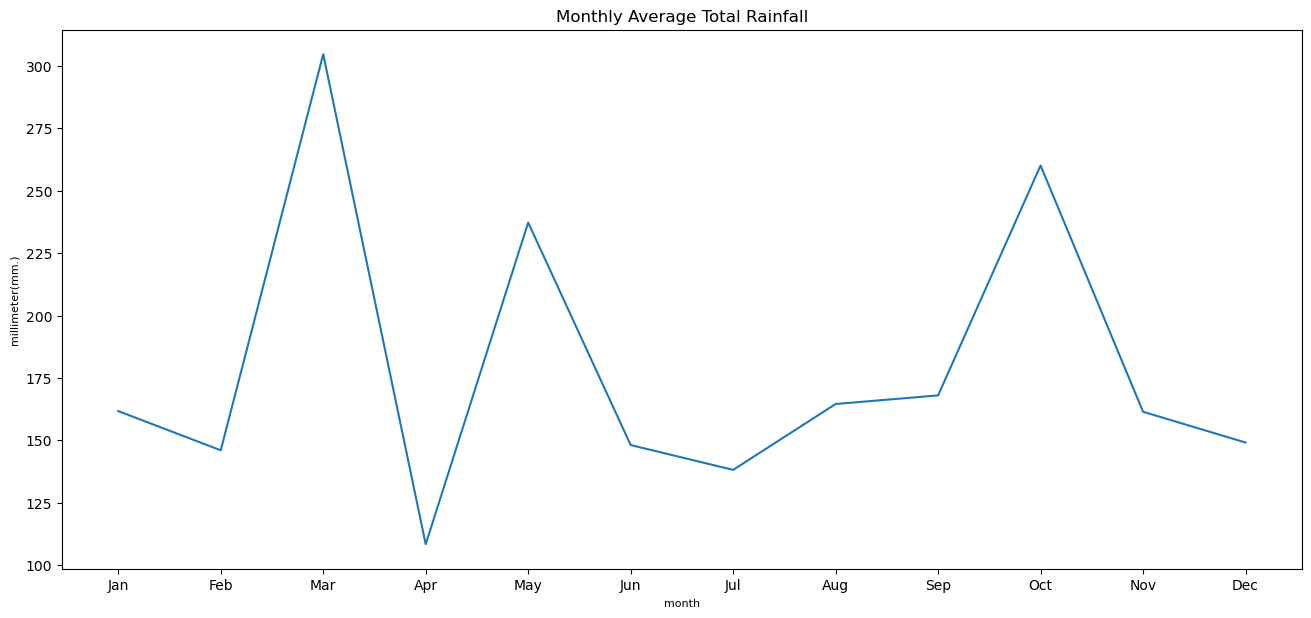

In [52]:
plt.figure(figsize = (16, 7))

x = df['month_name'].unique()

y = df.groupby('month_name')['total_rainfall'].agg(['mean'])


plt.plot(x,y);
plt.title("Monthly Average Total Rainfall")
plt.xlabel("month", fontsize = 8)
plt.ylabel("millimeter(mm.)", fontsize = 8);

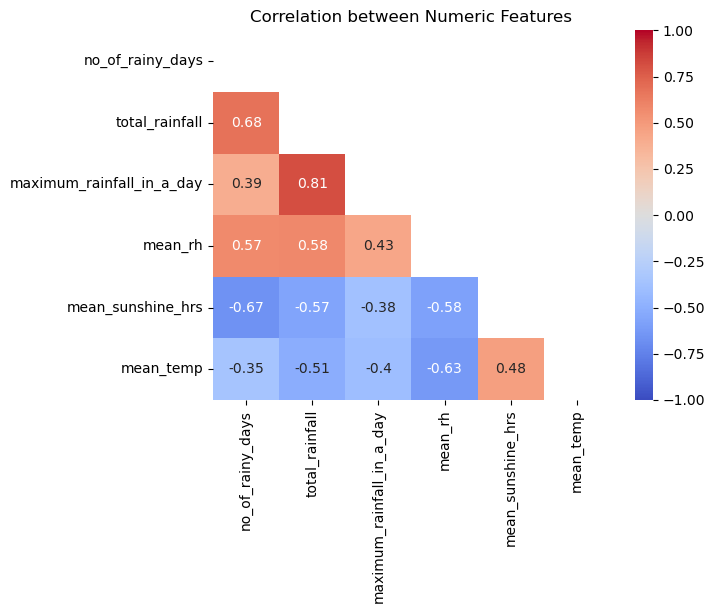

In [28]:

df1=df
df1=df1.drop(['year'], axis=1, inplace=False)
df1=df1.drop(['temp_mean_daily_min'], axis=1, inplace=False)
df1=df1.drop(['temp_mean_daily_max'], axis=1, inplace=False)
corr = df1.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask);
plt.title("Correlation between Numeric Features");


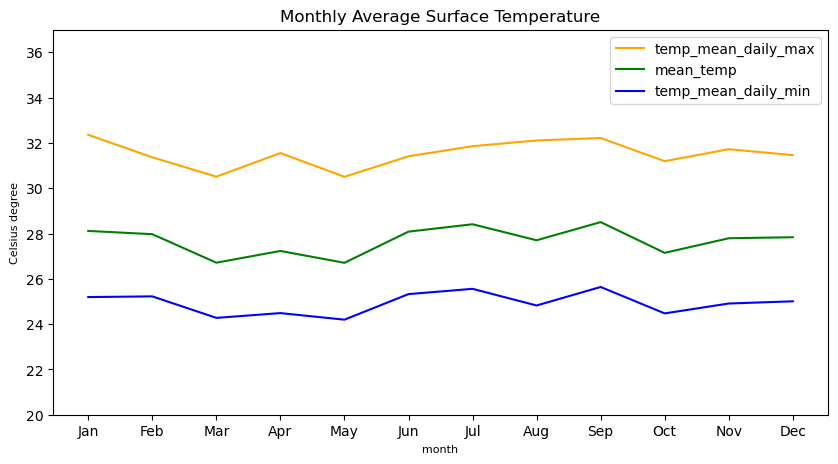

In [29]:
plt.figure(figsize = (10, 5))

x = df.groupby('month_name')['temp_mean_daily_min'].agg(['mean'])

y = df.groupby('month_name')['temp_mean_daily_max'].agg(['mean'])

z = df.groupby('month_name')['mean_temp'].agg(['mean'])

plt.plot(df['month_name'].unique(),y,label='temp_mean_daily_max', color = 'orange');
plt.plot(df['month_name'].unique(),z,label='mean_temp', color = 'green');
plt.plot(df['month_name'].unique(),x,label='temp_mean_daily_min', color = 'blue');
plt.legend(loc = 'upper right', fontsize = 'medium');
ax = plt.gca()
ax.set_ylim([20, 37])
plt.title("Monthly Average Surface Temperature")
plt.xlabel("month", fontsize = 8)
plt.ylabel("Celsius degree", fontsize = 8);

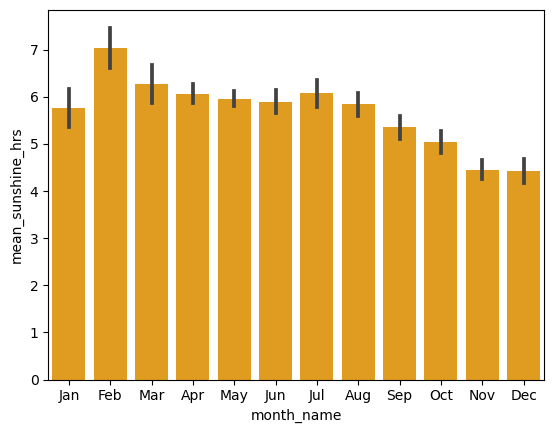

In [30]:
sns.barplot(x='month_name',y='mean_sunshine_hrs',data=df,color= 'orange');

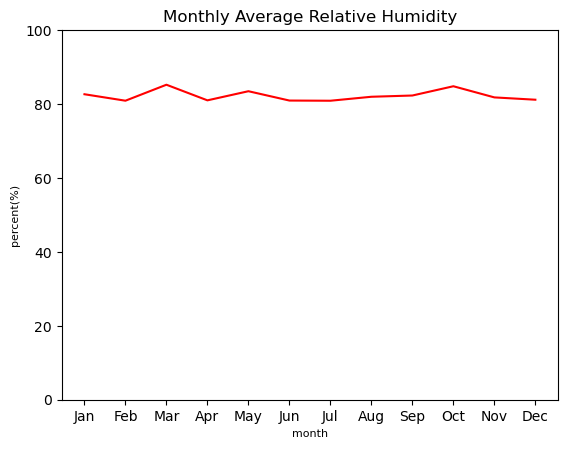

In [31]:
plt.plot(df['month_name'].unique(),df.groupby('month_name')['mean_rh'].agg(['mean']), color = 'red');
ax = plt.gca()
ax.set_ylim([0, 100]);
plt.title("Monthly Average Relative Humidity")
plt.xlabel("month", fontsize = 8)
plt.ylabel("percent(%)", fontsize = 8);

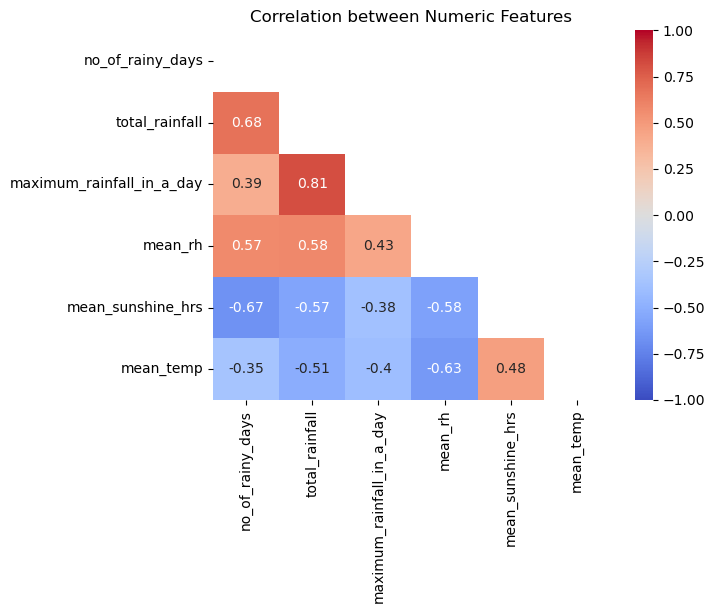

In [32]:

df1=df
df1=df1.drop(['year'], axis=1, inplace=False)
df1=df1.drop(['temp_mean_daily_min'], axis=1, inplace=False)
df1=df1.drop(['temp_mean_daily_max'], axis=1, inplace=False)
corr = df1.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask);
plt.title("Correlation between Numeric Features");


Text(0.5, 1.0, 'Boxplot for The Number of Rainy Days in Each Moonsoon ')

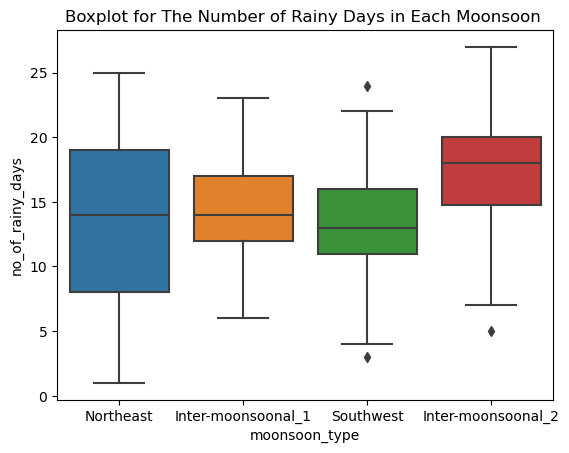

In [55]:
sns.boxplot(data=df,x='moonsoon_type', y='no_of_rainy_days');
plt.title("Boxplot for The Number of Rainy Days in Each Moonsoon ")

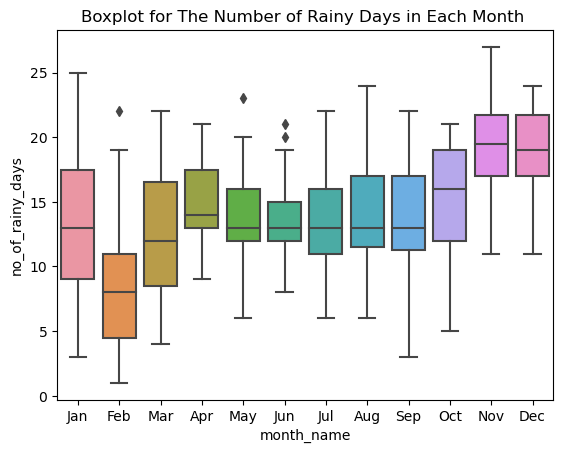

In [66]:
sns.boxplot(data=df,x='month_name', y='no_of_rainy_days');
plt.title("Boxplot for The Number of Rainy Days in Each Month ");

Text(0.5, 1.0, 'Boxplot for Total Rainfall in Each Moonsoon ')

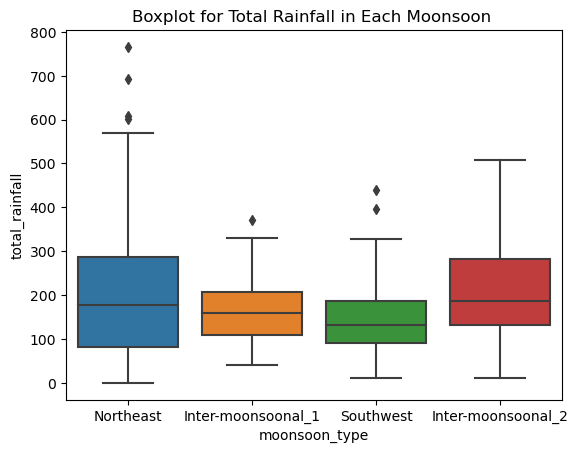

In [56]:
sns.boxplot(data=df,x='moonsoon_type', y='total_rainfall');
plt.title("Boxplot for Total Rainfall in Each Moonsoon ")

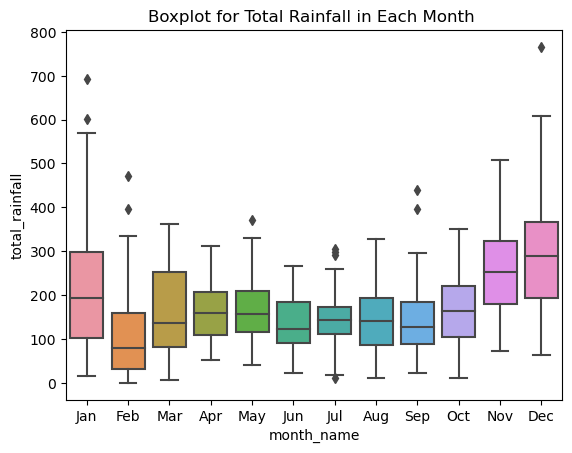

In [58]:
sns.boxplot(data=df,x='month_name', y='total_rainfall');
plt.title("Boxplot for Total Rainfall in Each Month ");

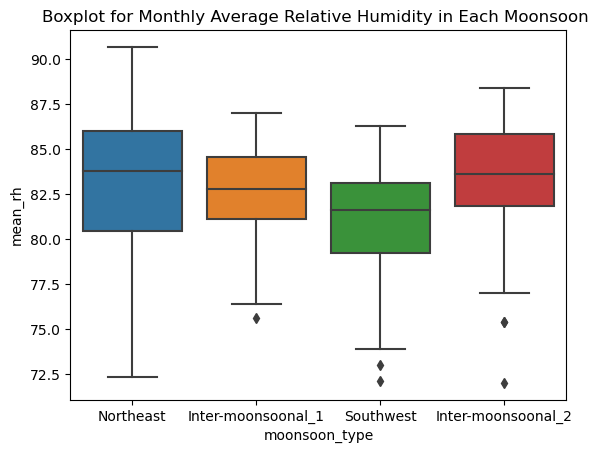

In [59]:
sns.boxplot(data=df,x='moonsoon_type', y='mean_rh');
plt.title("Boxplot for Monthly Average Relative Humidity in Each Moonsoon ");

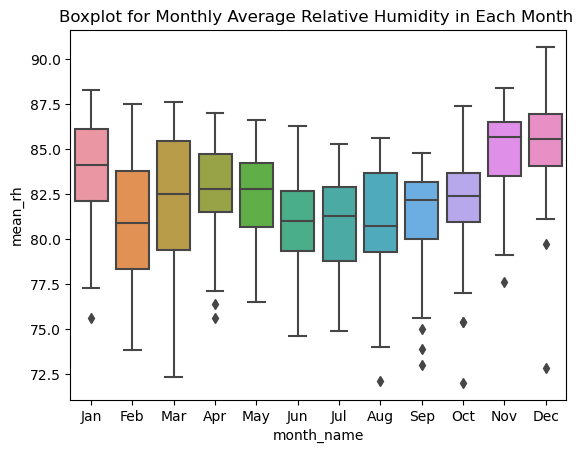

In [60]:
sns.boxplot(data=df,x='month_name', y='mean_rh');
plt.title("Boxplot for Monthly Average Relative Humidity in Each Month ");

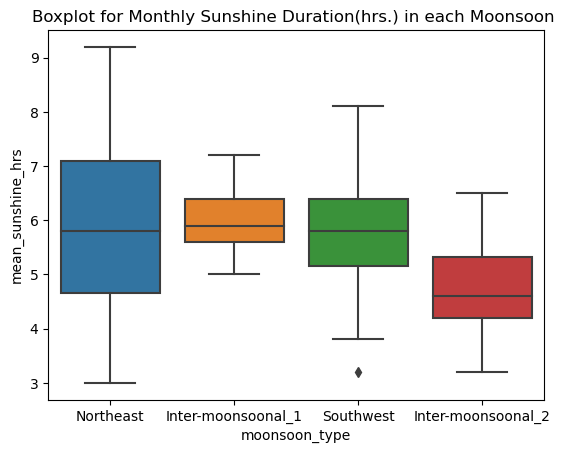

In [62]:
sns.boxplot(data=df,x='moonsoon_type', y='mean_sunshine_hrs');
plt.title("Boxplot for Monthly Sunshine Duration(hrs.) in each Moonsoon ");

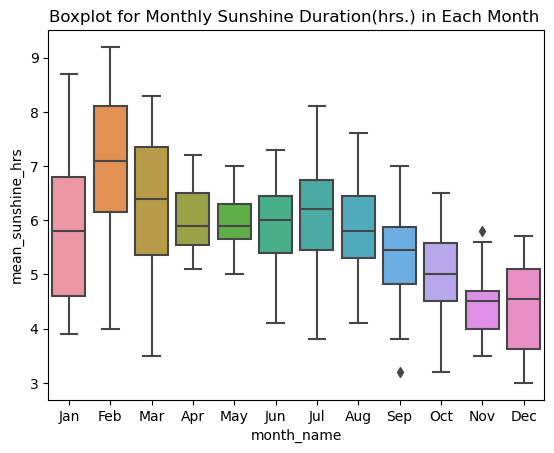

In [63]:
sns.boxplot(data=df,x='month_name', y='mean_sunshine_hrs');
plt.title("Boxplot for Monthly Sunshine Duration(hrs.) in Each Month ");

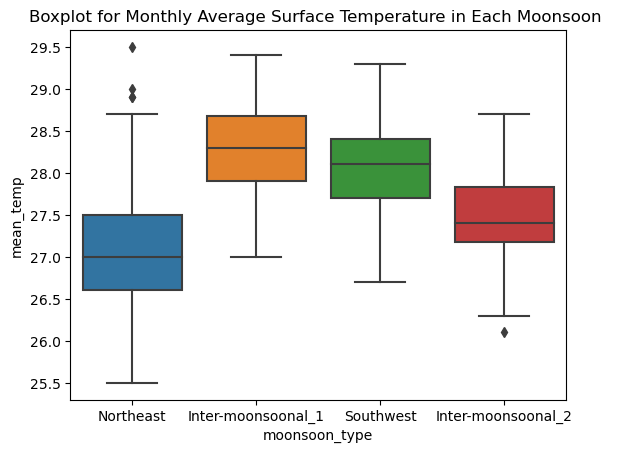

In [64]:
sns.boxplot(data=df,x='moonsoon_type', y='mean_temp');
plt.title("Boxplot for Monthly Average Surface Temperature in Each Moonsoon ");

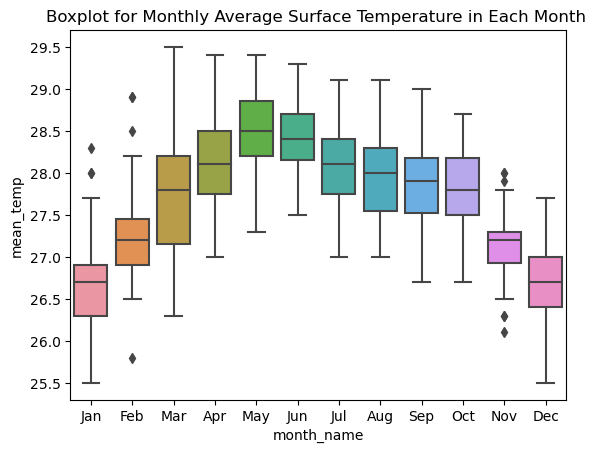

In [65]:
sns.boxplot(data=df,x='month_name', y='mean_temp');
plt.title("Boxplot for Monthly Average Surface Temperature in Each Month ");

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** By the analysis, for Northeast and inter_moonsoonal 2 ,we can go for forward strategy in order to gather revenues and new customers as the high rainfall and humidity, while for Southwest and inter_moonsoonal 1, we aim to backward strategy in order to maintain or decrease the cost and retain customers with CRM strategies as lower rainfall and high temperature with longer sunshine duration time.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!